Implementing a basic DE solver for the neutrino winds in terms of psi

Runge-Kutta method from Wikipedia:
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/25f03454fd25957cc63be11ec534efdce349c52f">
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/95bdbb2e3aa83735085c0aadd577162c69e4056a">
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/81398071e8f180ac143bfdf4598ff47bf79eb689">
I use $\psi$ in place of t, and {r,v} as y. I calculate separate k values for r and v to get y'={r',v'}

Questions/next steps:

Isentropic wind with ideal gas equation of state<br />
check small v0 - no turnover I can find<br />
check limits of gamma, maybe find v0 as a function of gamma<br />
calculate realistic a value<br />
incorporate general EoS, not just gamma law

In [3]:
%matplotlib inline
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


v vs r:
T vs r:
T vs v:


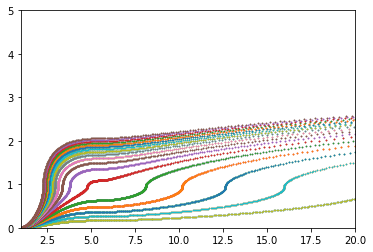

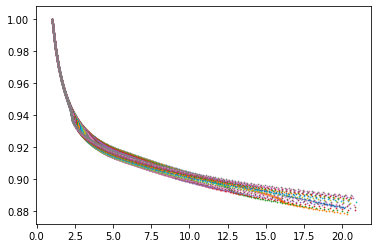

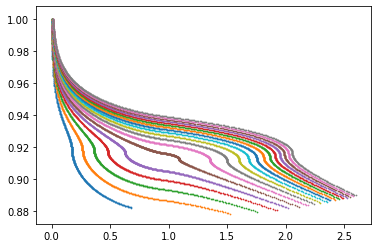

In [155]:
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import Adiabatic_wind_solver as aws
s=aws.solver(1.01,10)
s.makePlots(.001,.01,.0005,True,20,5);

v vs r:
T vs r:
T vs v:


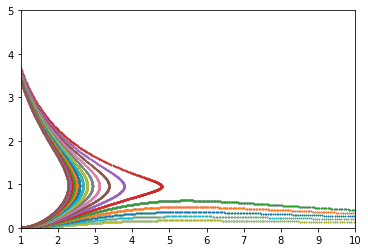

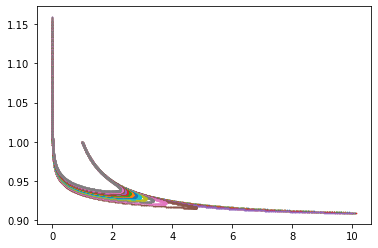

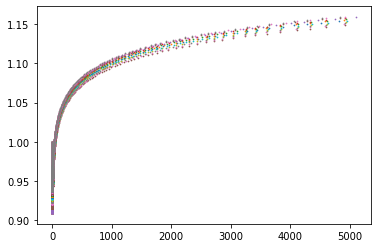

In [95]:
s.makePlots(.001,.01,.0005,False,10,5);

Lower bound on v0:  0.003436973285675047
Upper bound on v0:  0.003436983108520503
Estimated v0:  0.003436978197097775
Estimated error:  4.911422728150899e-09


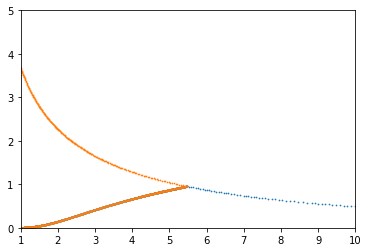

In [96]:
v0avg=s.findV0(.001,.006,.0001)

Max iteration count exceeded in adaptation


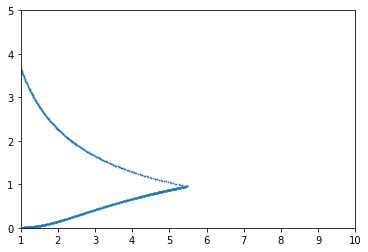

In [47]:
s.makePlot(v0avg,AV=False,xrange=10);

In [198]:
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import Adiabatic_wind_solver as aws
class NoSignChange(Exception):
    def __init__(self, message='No sign change'):
        # Call the base class constructor with the parameters it needs
        super(NoSignChange, self).__init__(message)
def gammaSearch(a=10):
    gdata=np.array([])
    error=False
    g=1
    i=0
    lower=.006
    upper=.008
    delta=.0001
    while not error and g<=5/3:
        print("Searching gamma=",g)
        s=aws.solver(g,10)
        #gdata=np.array([])
        if g==1:
            try:
                gdata=[g,s.findV0(lower,upper,(lower+upper)/2)]
                g=g+.0025
            except:
                print("No sign change, decrementing")
                upper=float(lower)
                lower=lower/2
        else:
            try:
                gdata=np.vstack((gdata,[g,s.findV0(lower,upper,(lower+upper)/2)]))
                g=g+.0025
                i=i+1
                print(gdata)
            except NoSignChange:
                print("No sign change, decrementing")
                upper=float(lower)
                lower=lower/2
            #except:
            #    error=True
            #    print("Error")
        
    print(gdata)
    return gdata

In [164]:
s1=aws.solver(1.00,10)
s1.findV0(1e-50,.005,.001)

No sign change in specified range


ValueError: 

Searching gamma= 1
No sign change in specified range
No sign change, decrementing
Searching gamma= 1
Lower bound on v0:  0.005075313376262784
Upper bound on v0:  0.005075325407087801
Estimated v0:  0.005075319391675293
Estimated error:  6.015412508820345e-09
Searching gamma= 1.0025
Lower bound on v0:  0.004629105962812902
Upper bound on v0:  0.004629117339849473
Estimated v0:  0.004629111651331187
Estimated error:  5.688518285324601e-09
[[1.         0.00507532]
 [1.0025     0.00462911]]
Searching gamma= 1.005
Lower bound on v0:  0.004207312233746053
Upper bound on v0:  0.0042073237281292685
Estimated v0:  0.004207317980937661
Estimated error:  5.747191607601704e-09
[[1.         0.00507532]
 [1.0025     0.00462911]
 [1.005      0.00420732]]
Searching gamma= 1.0074999999999998
Lower bound on v0:  0.003810056559741497
Upper bound on v0:  0.0038100668638944625
Estimated v0:  0.0038100617118179796
Estimated error:  5.1520764826704785e-09
[[1.         0.00507532]
 [1.0025     0.00462911]
 [1

Exception: NoSignChange

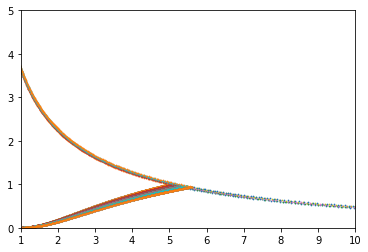

In [199]:
g=gammaSearch()

[1.     1.0025 1.005  1.0075 1.01   1.0125 1.015  1.0175 1.02   1.0225
 1.025  1.0275 1.03   1.0325 1.035  1.0375 1.04   1.0425 1.045  1.0475
 1.05   1.0525 1.055  1.0575 1.06   1.0625 1.065  1.0675 1.07   1.0725
 1.075 ] [5.07531939e-03 4.62911168e-03 4.20731793e-03 3.81006172e-03
 3.43697820e-03 3.08769045e-03 2.76168418e-03 2.45847754e-03
 2.17755699e-03 1.91831818e-03 1.68010798e-03 1.46168826e-03
 1.26368849e-03 1.08452499e-03 9.23378861e-04 7.79387712e-04
 6.51646996e-04 5.39213896e-04 4.41111088e-04 3.56331658e-04
 2.83816296e-04 2.22537220e-04 1.71461987e-04 1.29535294e-04
 9.56936359e-05 6.89108849e-05 4.81853008e-05 3.25580120e-05
 2.11319447e-05 1.30738735e-05 7.62640238e-06]


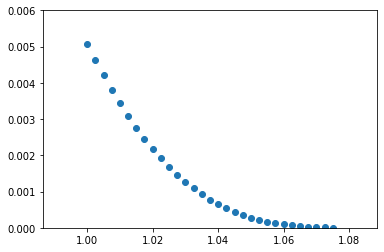

In [150]:
print(g[:,0],g[:,1])
plt.figure(1)
#plt.xscale("log")
plt.ylim((0,.006))
plt.scatter(g[:,0],g[:,1])
#np.log(1.000001)

0

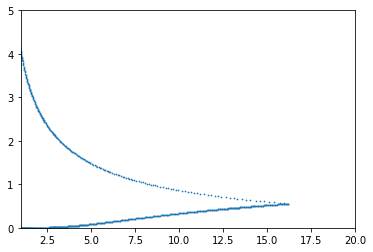

In [116]:
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import Adiabatic_wind_solver as aws
s2=aws.solver(1.07250000e+00,10)
s2.makePlot(1.30738831e-05,AV=False,xrange=20)

In [185]:
n=0
def er():
    raise NoSignChange
try:
    n=n+1
    er()
    n=n+1
except NoSignChange:
    print("no sign change")
print(n)

no sign change
1


In [152]:
import csv
with open('gamma_data.csv', mode='w') as dfile:
    datawriter = csv.writer(dfile, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    for i in range(len(g)):
        datawriter.writerow([g[i,0],g[i,1]])
dfile.close()
